In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regression with an Abalone Dataset

- https://www.kaggle.com/competitions/playground-series-s4e4/code

- 1조 공유드라이브 내 분류/회귀 자료별 폴더가 존재합니다.
- 동일한 파일이름이기 때문에 분류는 c_train, 회귀는 r_train으로 파일명 변경했습니다.

## 데이터 로드

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

- 제출한 파일 '회귀_자료'에서 csv파일 다운로드 하시고 로드하시면 됩니다.

In [4]:
train=pd.read_csv('/content/drive/MyDrive/데이터분석 부트캠프 24.02.14/파이널프로젝트/공통/playground-series-s4e4/train.csv')
test=pd.read_csv('/content/drive/MyDrive/데이터분석 부트캠프 24.02.14/파이널프로젝트/공통/playground-series-s4e4/test.csv')
sample_submission=pd.read_csv('/content/drive/MyDrive/데이터분석 부트캠프 24.02.14/파이널프로젝트/공통/playground-series-s4e4/sample_submission.csv')
sub_data=pd.read_csv('/content/drive/MyDrive/데이터분석 부트캠프 24.02.14/파이널프로젝트/공통/playground-series-s4e4/abalone.csv')

- 성: 이 특징은 전복의 성별을 나타내며 수컷(M), 암컷(F) 또는 유아(I)로 분류됩니다.

- 길이: 길이 특징은 전복 껍질의 정점에서 기부까지 밀리미터 단위로 측정된 가장 긴 측정값을 나타냅니다.

- 직경: 지름은 길이에 수직인 전복 껍질의 측정값을 나타내며 밀리미터 단위로도 측정됩니다.

- 높이: 이 특징은 길이와 직경에 의해 형성된 평면에 수직으로 측정된 전복 껍질의 높이를 밀리미터 단위로 나타냅니다.

- 전체 중량: 전체 무게는 고기와 껍질을 모두 포함하는 전복의 총 무게를 그램 단위로 나타냅니다.

- 전체 무게.1(껍질을 벗긴 무게): 이 기능은 그램 단위로 측정된 전복 고기의 무게만 나타냅니다. 껍질에서 추출한 고기의 양을 나타냅니다.

- 전체 중량.2 (내장 중량): 내장 중량은 출혈 후 전복 장의 무게를 그램 단위로 측정한 것입니다. 그것은 전복의 내부 장기의 무게에 대한 통찰력을 제공합니다.

- 쉘 무게: 이 기능은 육류를 제외한 전복 껍질의 무게만 그램 단위로 측정한 것입니다. 그것은 전복의 껍질과 식용 부분 사이의 무게 분포에 대한 통찰력을 제공합니다.

- 반지: 나이테는 전복 껍데기에 있는 나이테의 수를 의미하며, 전복의 나이를 나타내는 지표 역할을 합니다.

In [5]:
display(train.head())
display(test.head())
display(sample_submission.head())
display(sub_data.head())

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  
0          0.3125        0.3005  
1          0.2195        0.2750  
2          0.1845        0.2405  
3          0.1865        0.2350  
4          0.0670        0.1050

id  Rings
0  90615     10
1  90616     10
2  90617     10
3  90618     10
4  90619     10

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [6]:
train.shape, test.shape, sub_data.shape

((90615, 10), (60411, 9), (4177, 9))

In [7]:
train.info(), test.info() , sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 

(None, None, None)

In [8]:
# 피처 요약표
def summary_feature_info( df ):
    summary_df = pd.DataFrame( df.dtypes, columns=['타입'])
    summary_df['결측치수'] = df.isnull().sum().values
    summary_df['고유값수'] = df.nunique().values
    summary_df['샘플값_0'] = df.iloc[0].values
    summary_df['샘플값_1'] = df.iloc[1].values
    summary_df['샘플값_2'] = df.iloc[2].values
    return summary_df

summary_feature_info = summary_feature_info( train )
summary_feature_info

타입  결측치수   고유값수   샘플값_0   샘플값_1   샘플값_2
id                int64     0  90615       0       1       2
Sex              object     0      3       F       F       I
Length          float64     0    157    0.55    0.63    0.16
Diameter        float64     0    126    0.43    0.49    0.11
Height          float64     0     90    0.15   0.145   0.025
Whole weight    float64     0   3175  0.7715    1.13   0.021
Whole weight.1  float64     0   1799  0.3285   0.458  0.0055
Whole weight.2  float64     0    979  0.1465  0.2765   0.003
Shell weight    float64     0   1129    0.24    0.32   0.005
Rings             int64     0     28      11      11       6

# EDA

## 추가데이터 결합

In [9]:
train_df=train.drop(columns=['id'])
sub_data=sub_data.rename(columns={
    'Shucked weight':'Whole weight.1',
    'Viscera weight':'Whole weight.2'
})
display(train_df.info()),display(sub_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Whole weight.1  4177 non-null   float64
 6   Whole weight.2  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


None

(None, None)

In [10]:
train_sub=pd.concat([train_df,sub_data],axis=0)
train_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


## train과 test EDA 비교

In [11]:
test_drop_id=test.drop(columns=['id'])

In [12]:
display(train_sub.describe()), display(test_drop_id.describe()),train_sub.shape, test_drop_id.shape

Length      Diameter        Height  Whole weight  Whole weight.1  \
count  94792.000000  94792.000000  94792.000000  94792.000000    94792.000000   
mean       0.517402      0.401952      0.135643      0.790785        0.341597   
std        0.118308      0.098088      0.038193      0.459231        0.205267   
min        0.075000      0.055000      0.000000      0.002000        0.001000   
25%        0.445000      0.345000      0.110000      0.419500        0.177500   
50%        0.545000      0.425000      0.140000      0.799500        0.330000   
75%        0.600000      0.470000      0.160000      1.072500        0.464500   
max        0.815000      0.650000      1.130000      2.825500        1.488000   

       Whole weight.2  Shell weight         Rings  
count    94792.000000  94792.000000  94792.000000  
mean         0.169914      0.226468      9.707233  
std          0.101334      0.130639      3.178704  
min          0.000500      0.001500      1.000000  
25%          0.086500      0.120000      8.000000  
50%          0.166000      0.225000      9.000000  
75%          0.233000      0.305000     11.000000  
max          0.760000      1.005000     29.000000

Length      Diameter        Height  Whole weight  Whole weight.1  \
count  60411.000000  60411.000000  60411.000000  60411.000000    60411.000000   
mean       0.517428      0.401961      0.135751      0.790062        0.341227   
std        0.117609      0.097470      0.038175      0.457591        0.204221   
min        0.075000      0.055000      0.000000      0.002000        0.001000   
25%        0.450000      0.345000      0.110000      0.419500        0.178500   
50%        0.545000      0.425000      0.140000      0.801500        0.329000   
75%        0.600000      0.470000      0.160000      1.070000        0.464500   
max        0.800000      0.650000      1.095000      2.825500        1.488000   

       Whole weight.2  Shell weight  
count    60411.000000  60411.000000  
mean         0.169419      0.226125  
std          0.100720      0.129826  
min          0.000500      0.001500  
25%          0.086500      0.120000  
50%          0.166000      0.225000  
75%          0.232500      0.305000  
max          0.641500      1.004000

(None, None, (94792, 9), (60411, 8))

In [13]:
train_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


### 분포확인
- 대부분의 피쳐에서 편향이 발견됨
- 직경, 전체무게에서 높은 수치가 발견됨

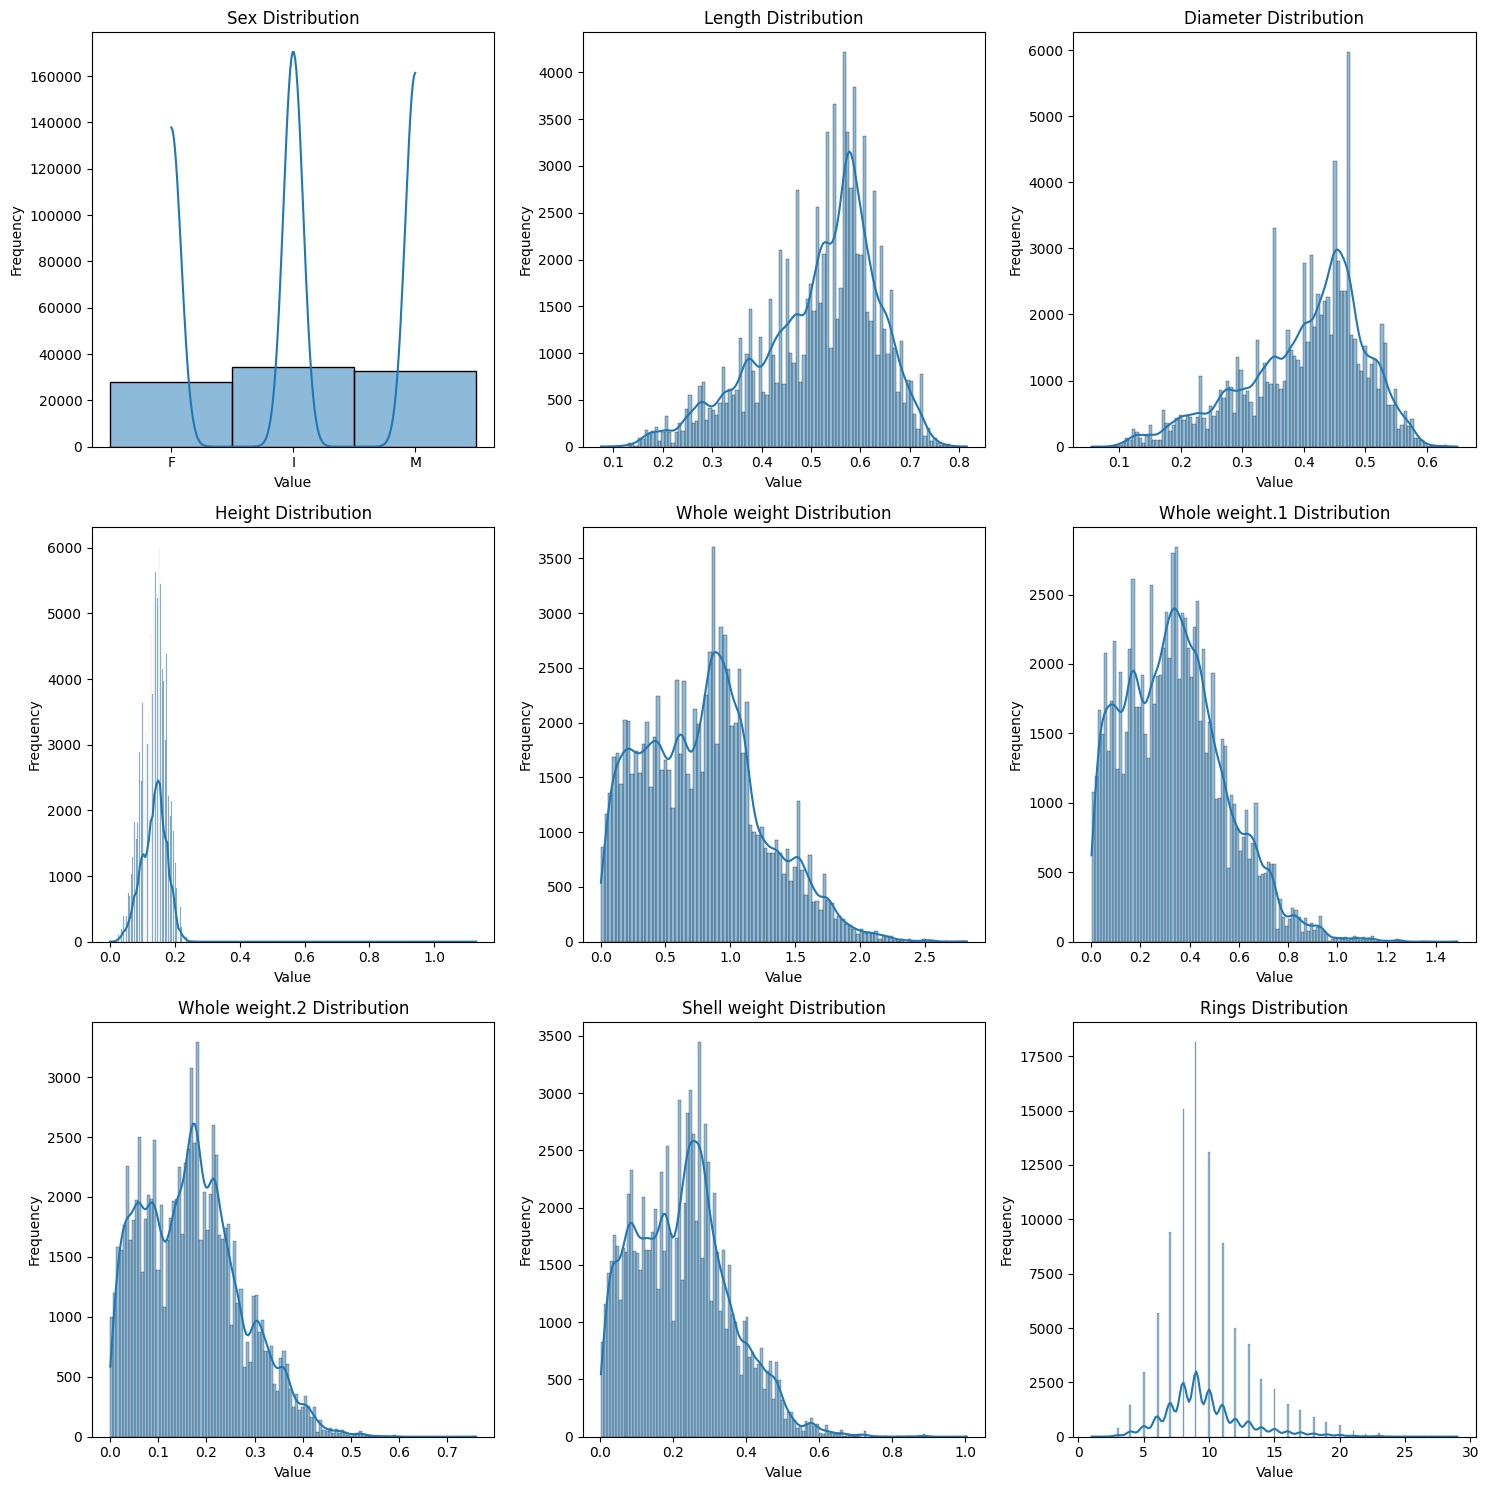

In [14]:
# train_sub 데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

# 서브플롯을 사용하여 각 피처의 분포를 시각화합니다.
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# 각 열의 이름을 가져옵니다.
columns = train_sub.columns

# 피처의 개수만큼 루프를 돌면서 분포를 시각화합니다.
for i, column in enumerate(columns):
    sns.histplot(train_sub[column], ax=axs[i], kde=True)
    axs[i].set_title(f'{column} Distribution')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# 나머지 subplot을 비웁니다.
for ax in axs[len(columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


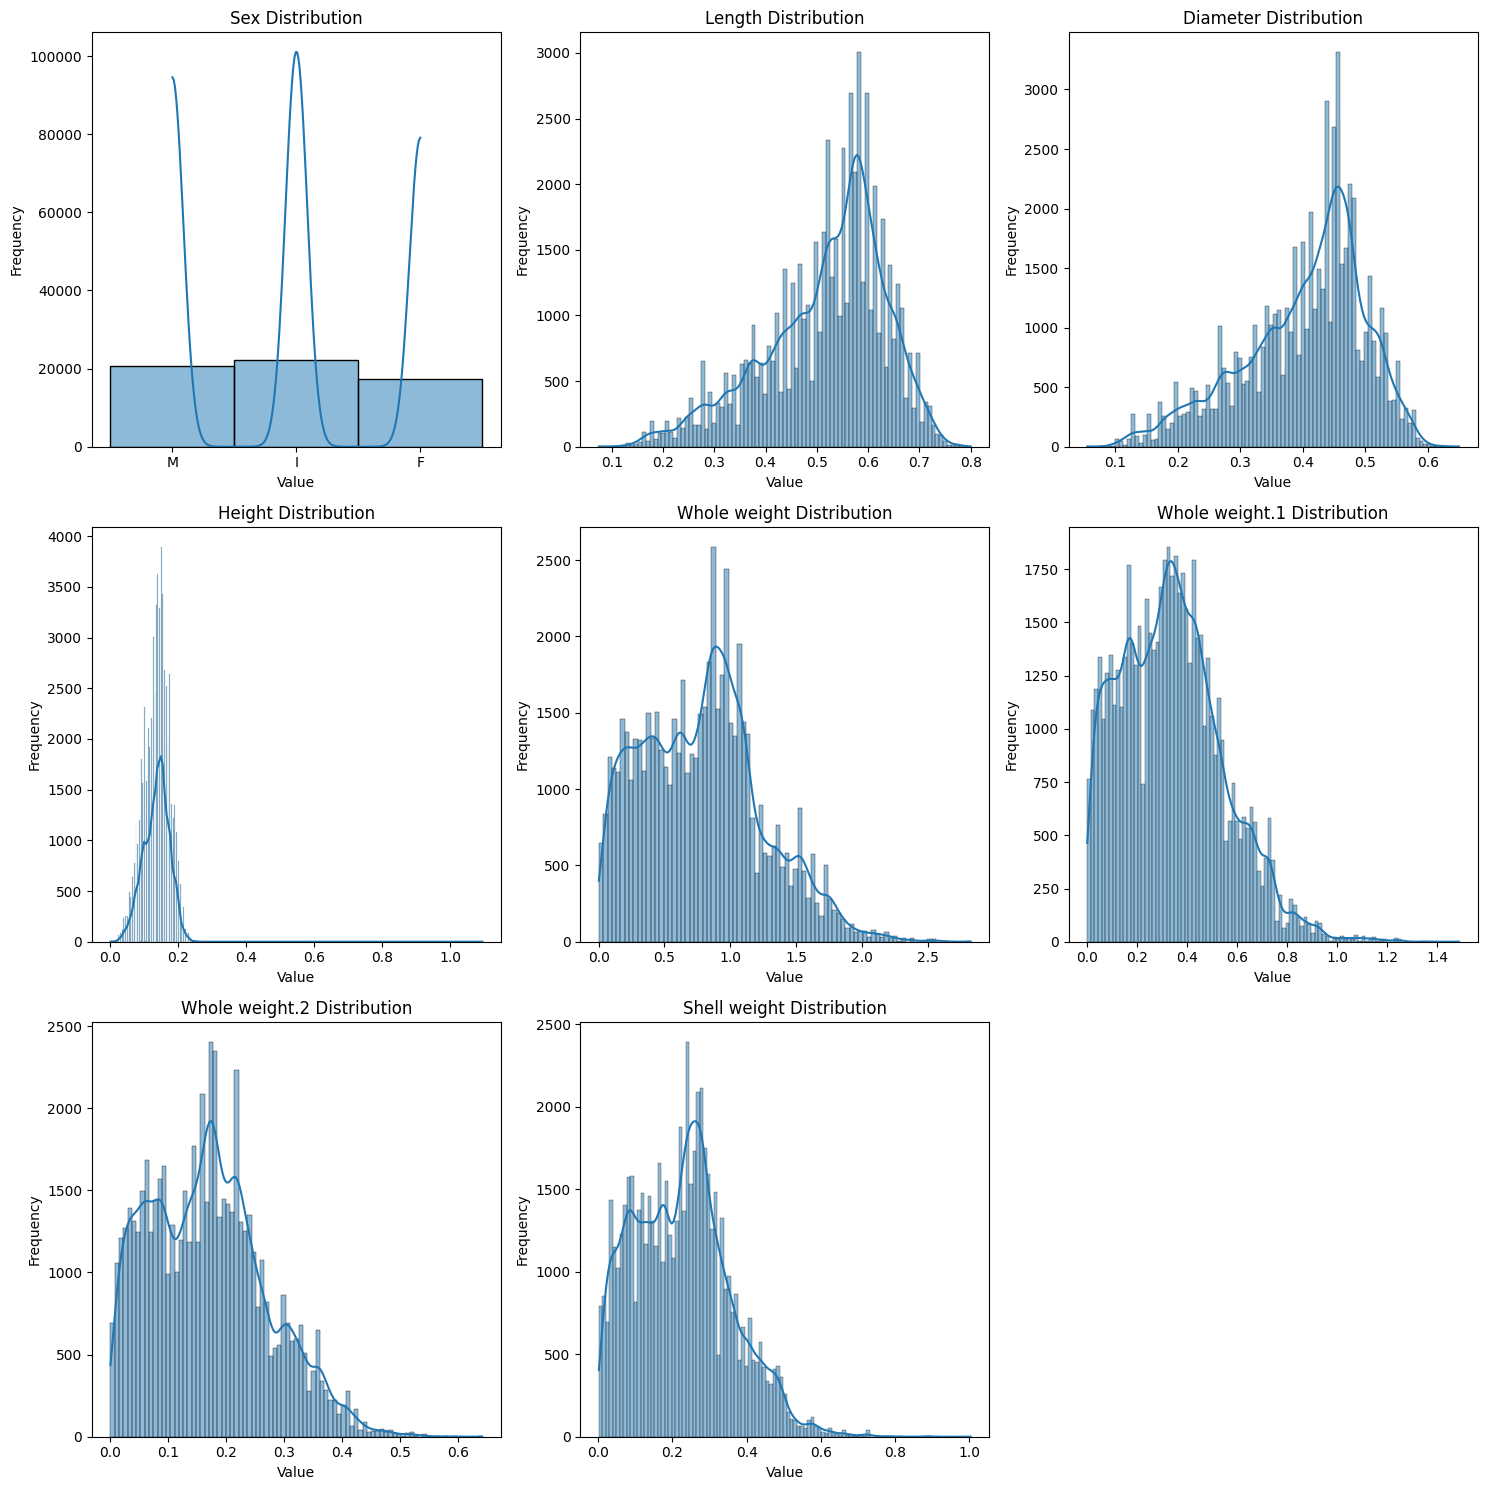

In [15]:
# test_drop_id 데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

# 서브플롯을 사용하여 각 피처의 분포를 시각화합니다.
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# 각 열의 이름을 가져옵니다.
columns = test_drop_id.columns

# 피처의 개수만큼 루프를 돌면서 분포를 시각화합니다.
for i, column in enumerate(columns):
    sns.histplot(test_drop_id[column], ax=axs[i], kde=True)
    axs[i].set_title(f'{column} Distribution')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# 나머지 subplot을 비웁니다.
for ax in axs[len(columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


### 피쳐간 결정계수 확인
- 다 높아서 판단이 어려움

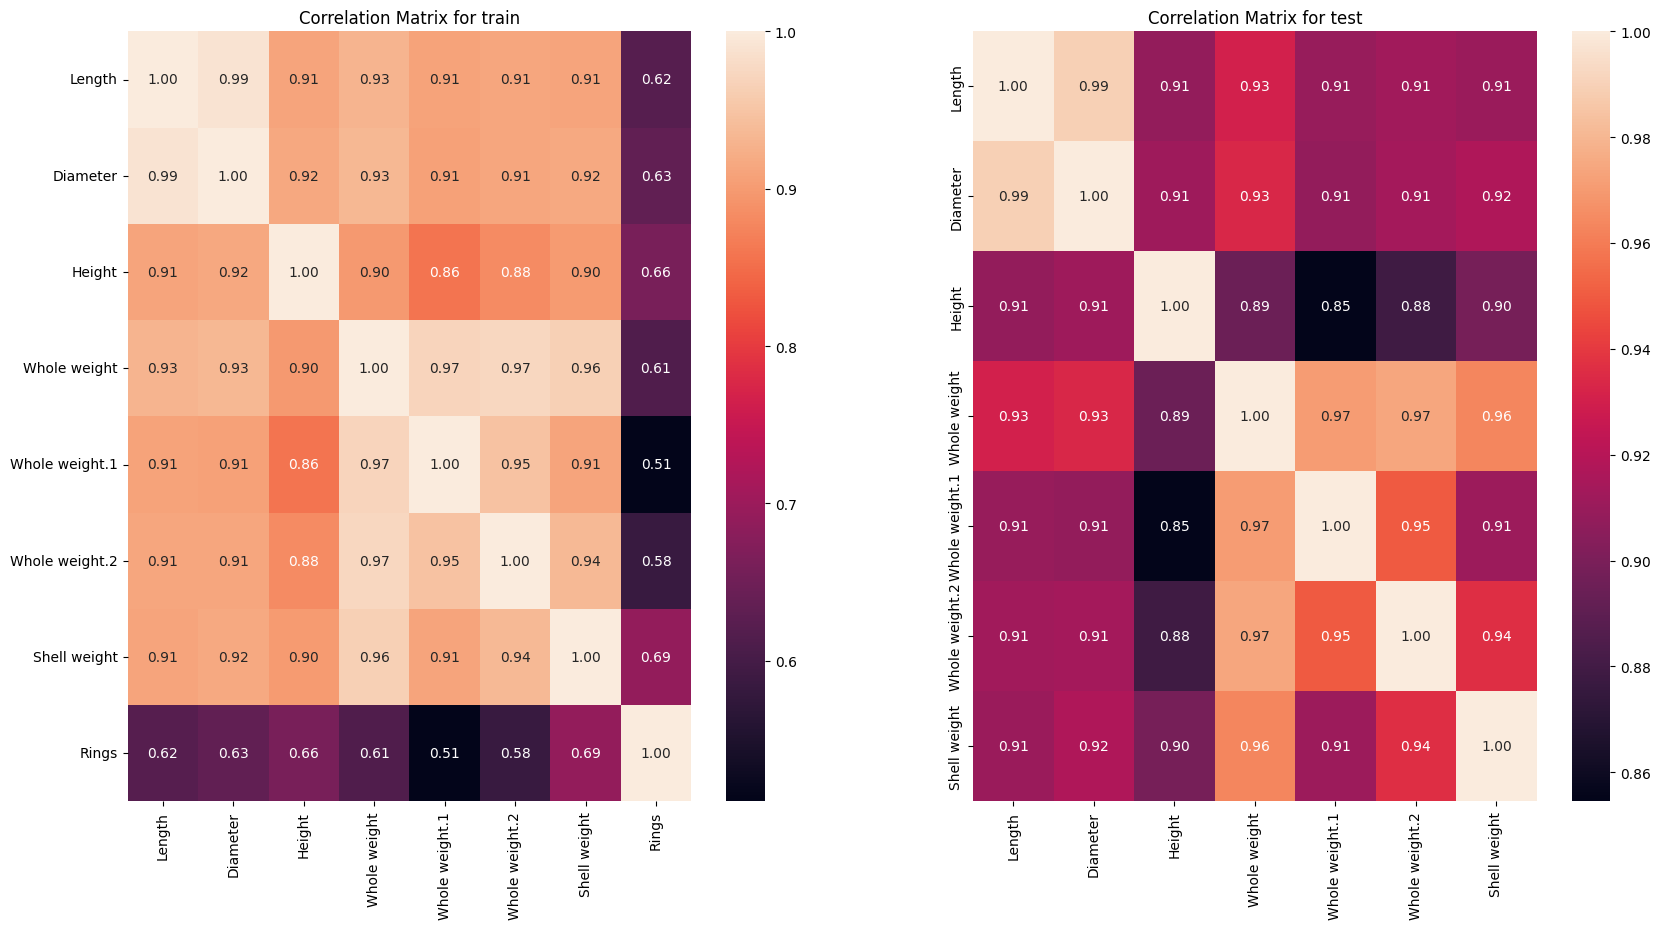

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

corr_matrix1 = train_sub.iloc[:,1:].corr()
corr_matrix2 = test_drop_id.iloc[:,1 :].corr()

sns.heatmap(corr_matrix1, annot=True, fmt=".2f",ax=axs[0])
axs[0].set_title('Correlation Matrix for train')
sns.heatmap(corr_matrix2, annot=True, fmt=".2f",ax=axs[1])
axs[1].set_title('Correlation Matrix for test')

plt.show()

- height에서 높은 측정치를 나타내는 군집이 있음
- train과 test 모두에 존재함

### pairplot

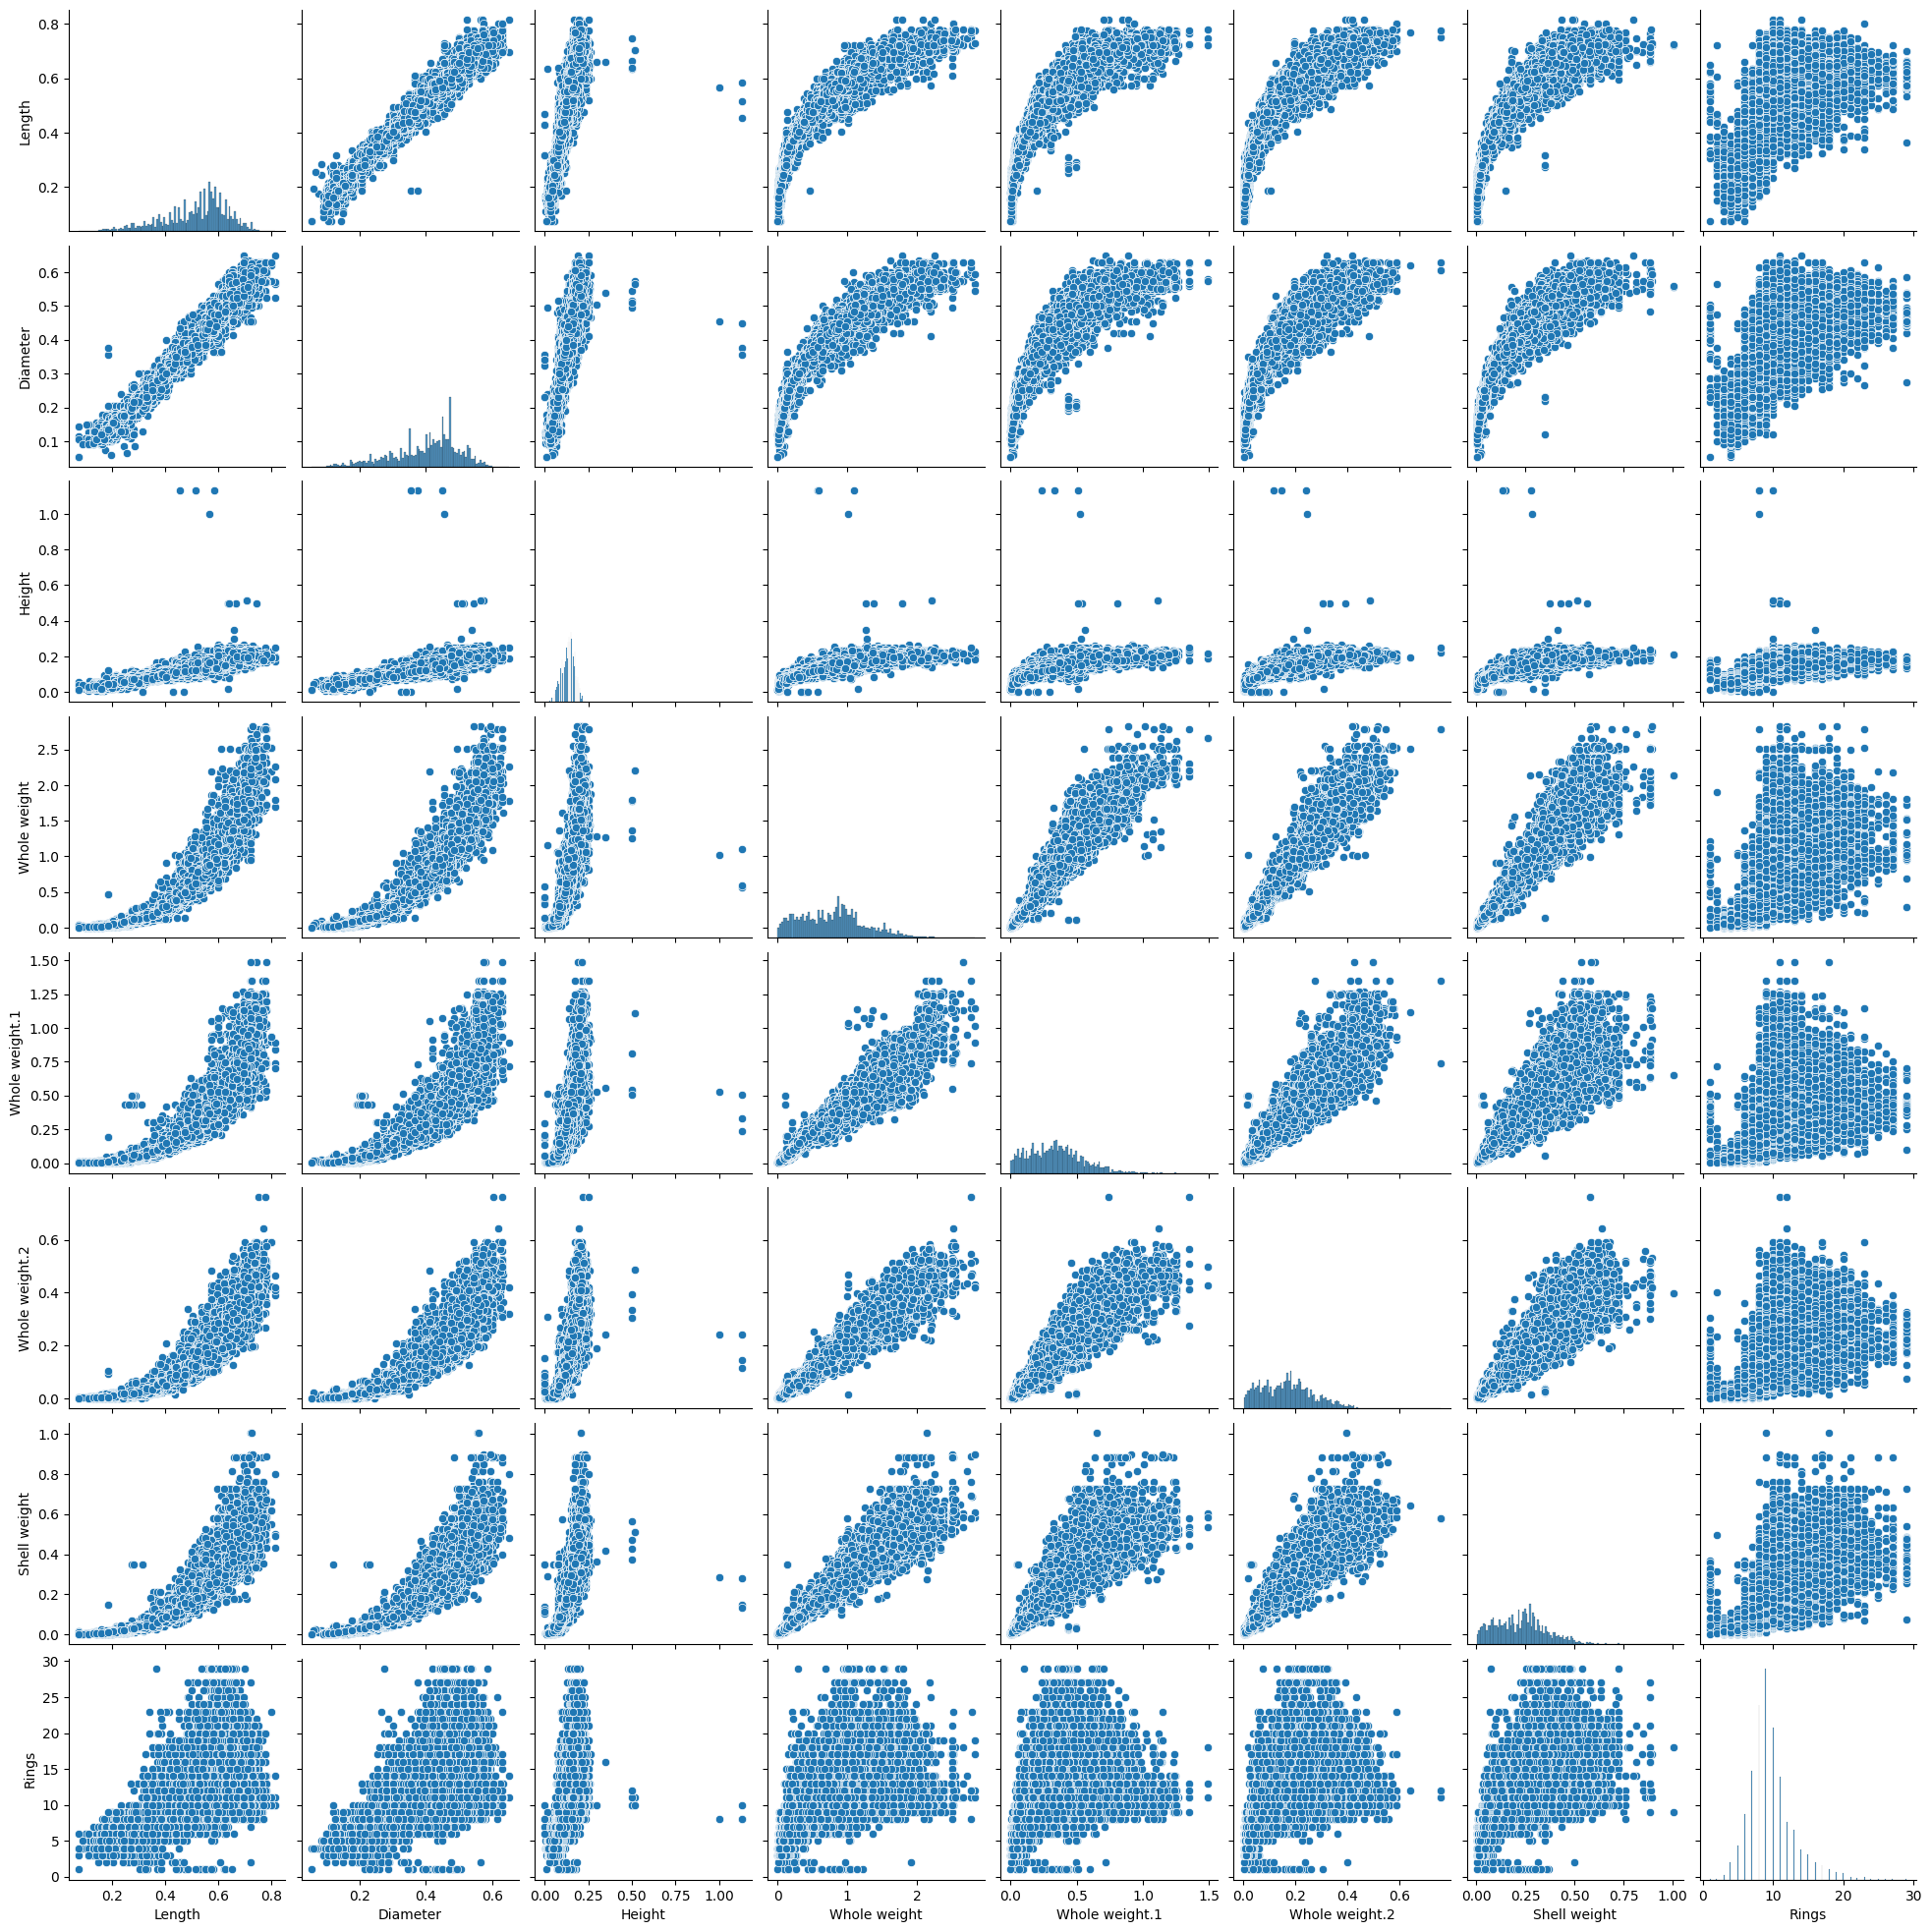

In [17]:
sns.pairplot(train_sub)

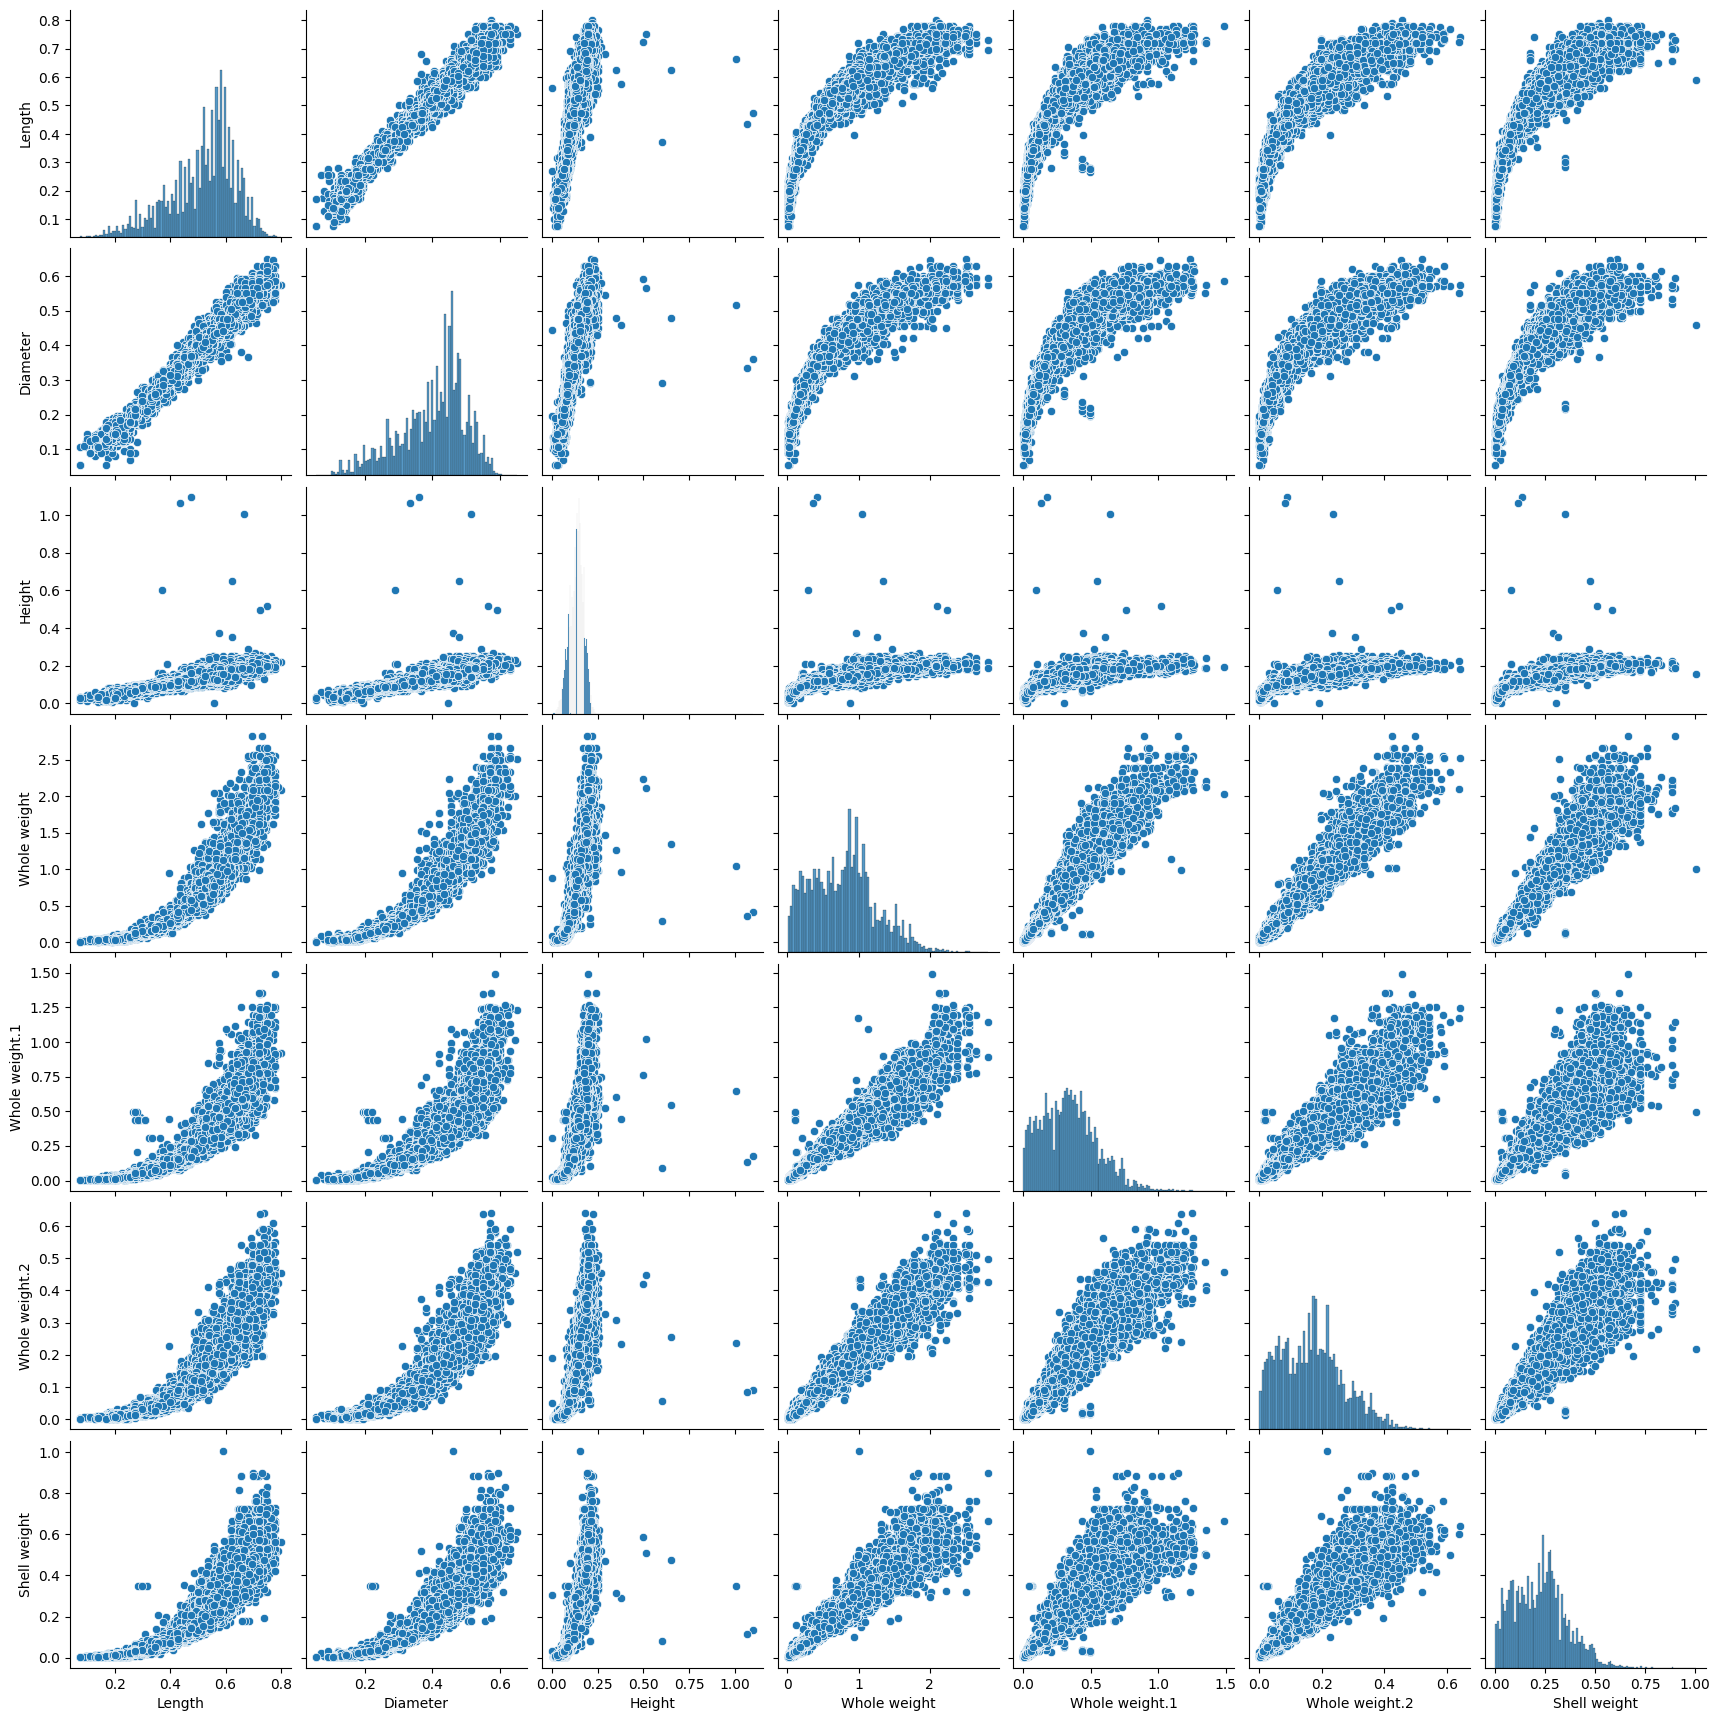

In [18]:
sns.pairplot(test_drop_id)

### rings를 위주로 관계 확인

<Axes: xlabel='Sex', ylabel='Rings'>

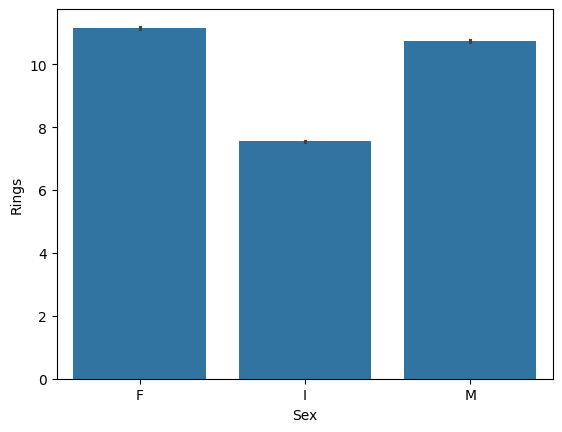

In [19]:
sns.barplot(x='Sex',y='Rings',data=train_sub)

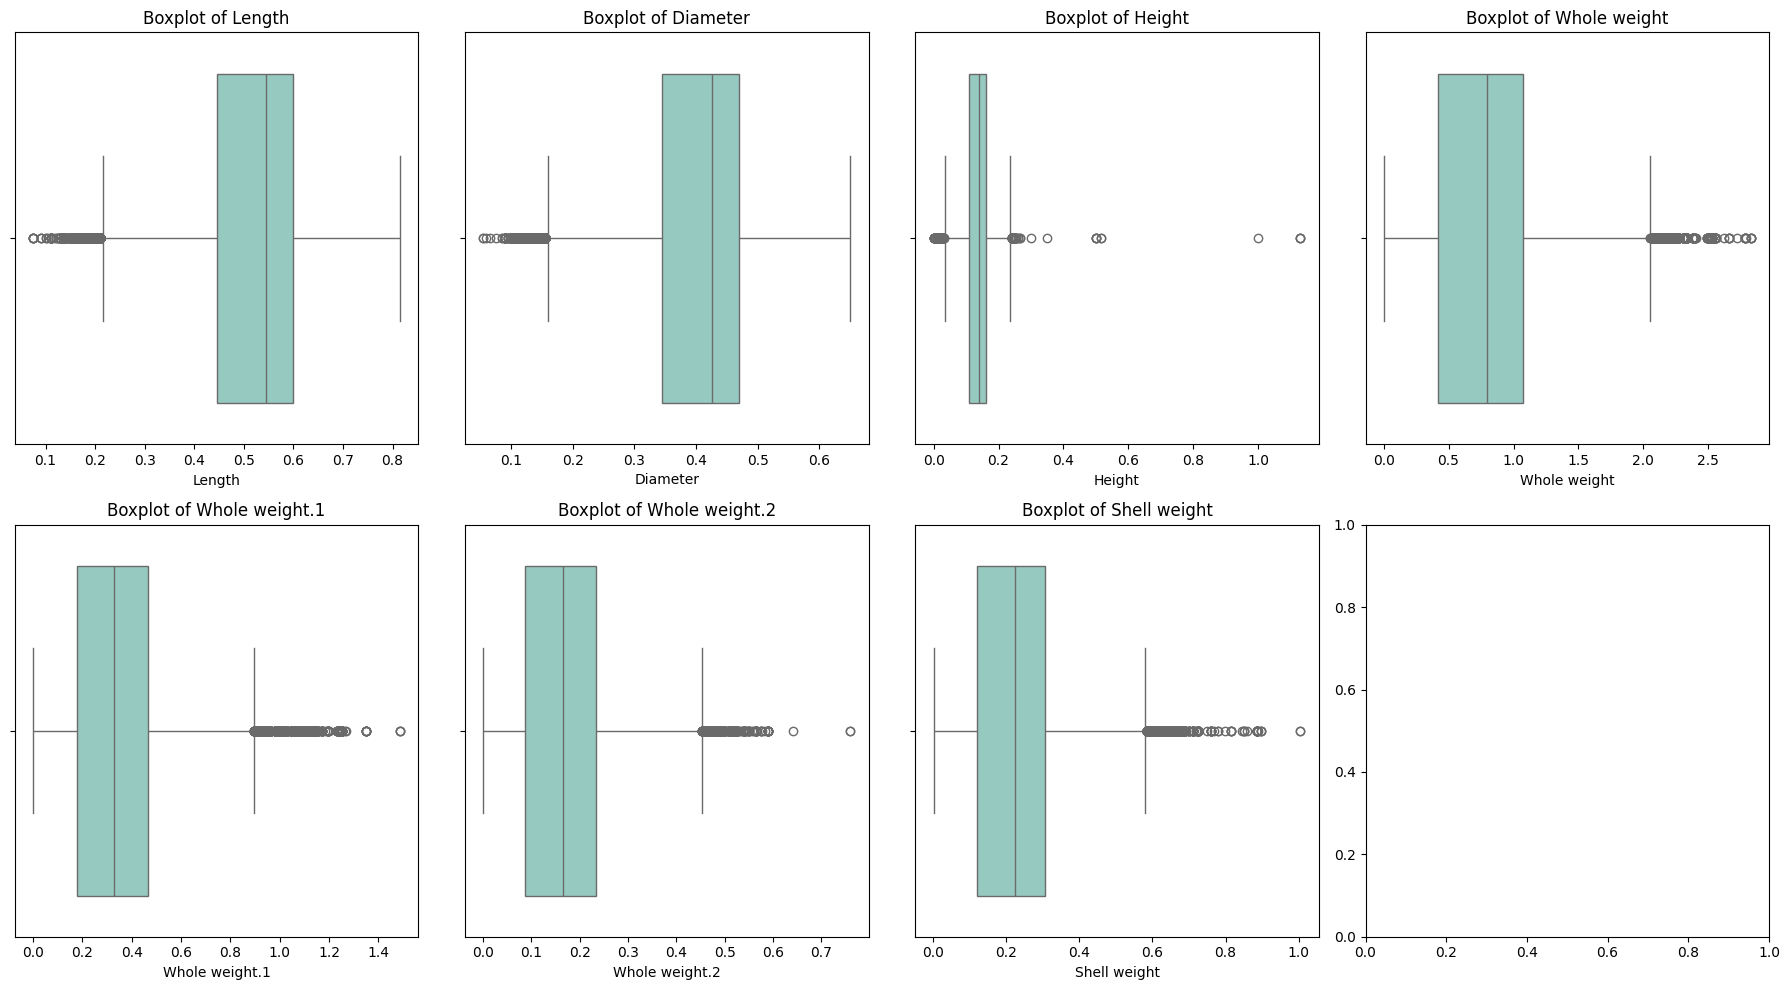

In [20]:
# Define continuous features (excluding 'Rings')
continuous_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

# Create subplots for each continuous feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each continuous feature
for i, feature in enumerate(continuous_features):
    # Create box plot
    sns.boxplot(x=train_sub[feature], ax=axes[i],palette = "Set3")
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

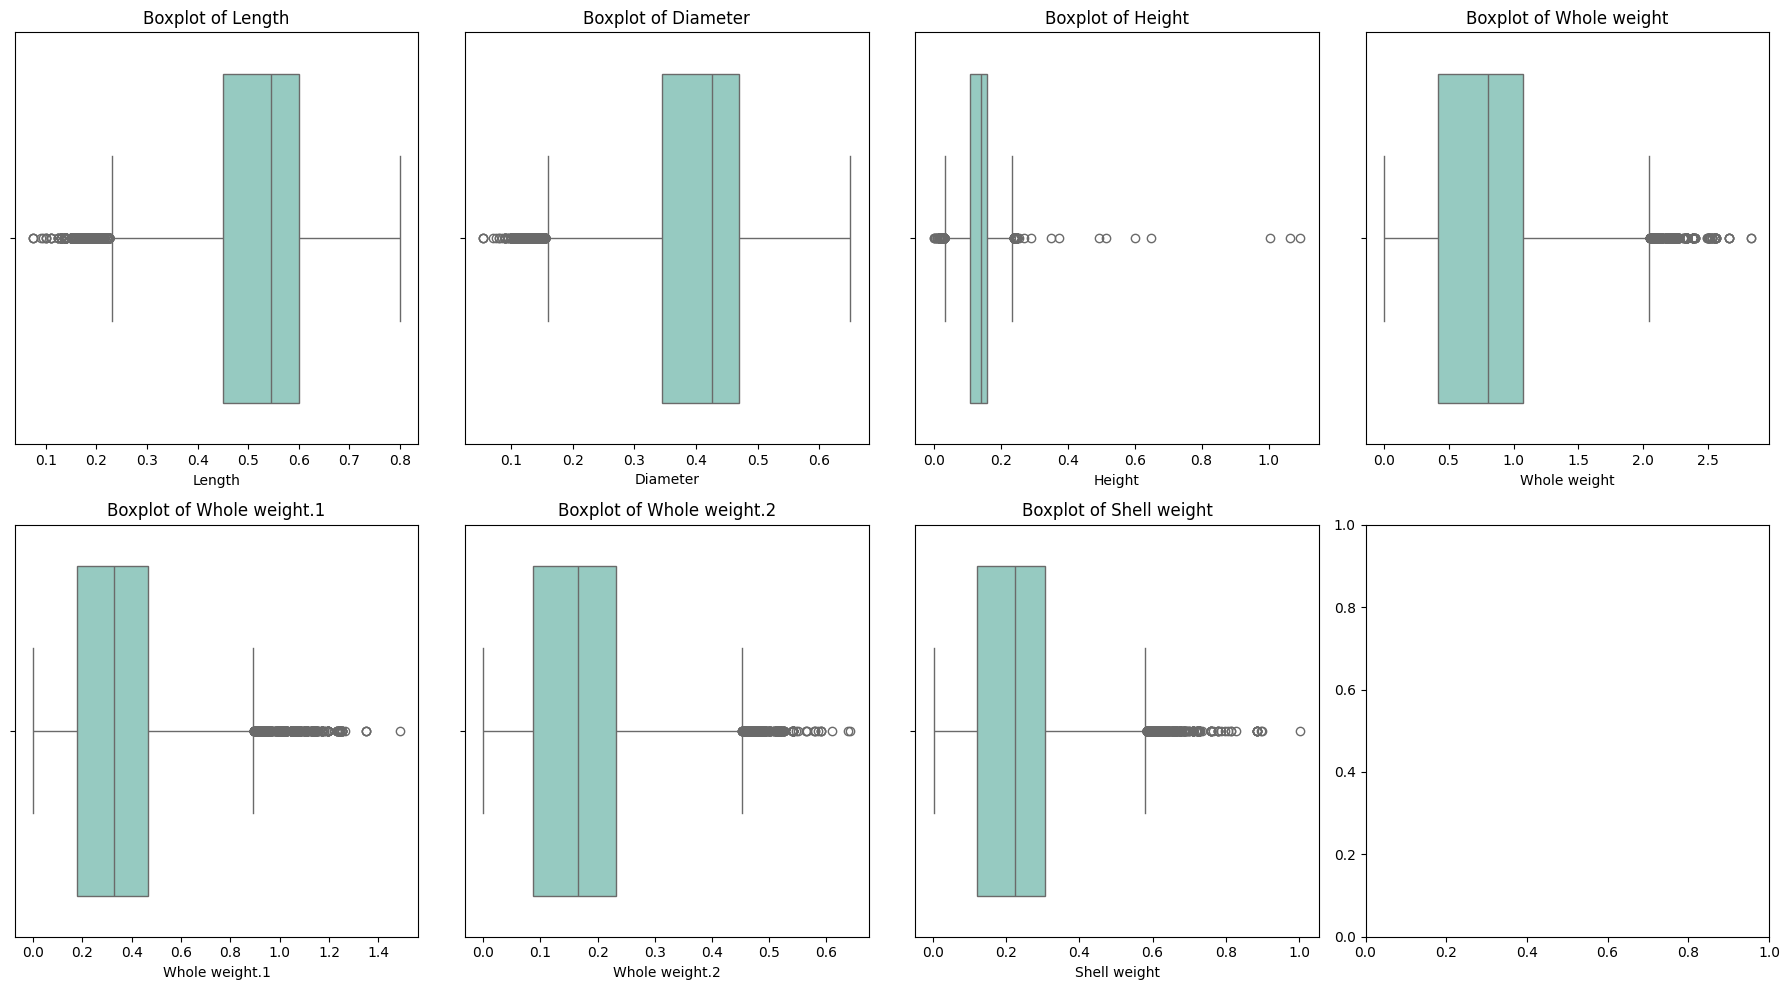

In [21]:
# Define continuous features (excluding 'Rings')
continuous_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

# Create subplots for each continuous feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each continuous feature
for i, feature in enumerate(continuous_features):
    # Create box plot
    sns.boxplot(x=test_drop_id[feature], ax=axes[i],palette = "Set3")
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

- Rings의 분포 확인

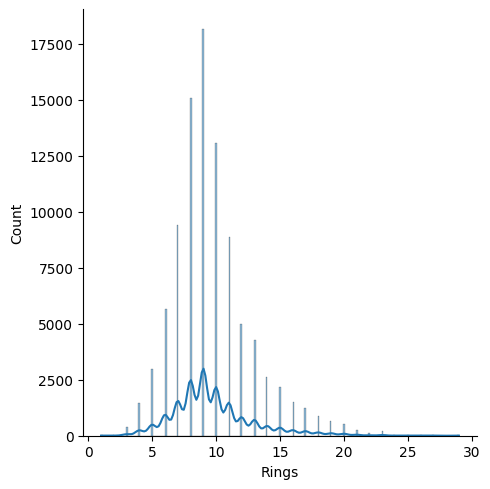

In [22]:
display(sns.displot(train_sub['Rings'],kde=True))

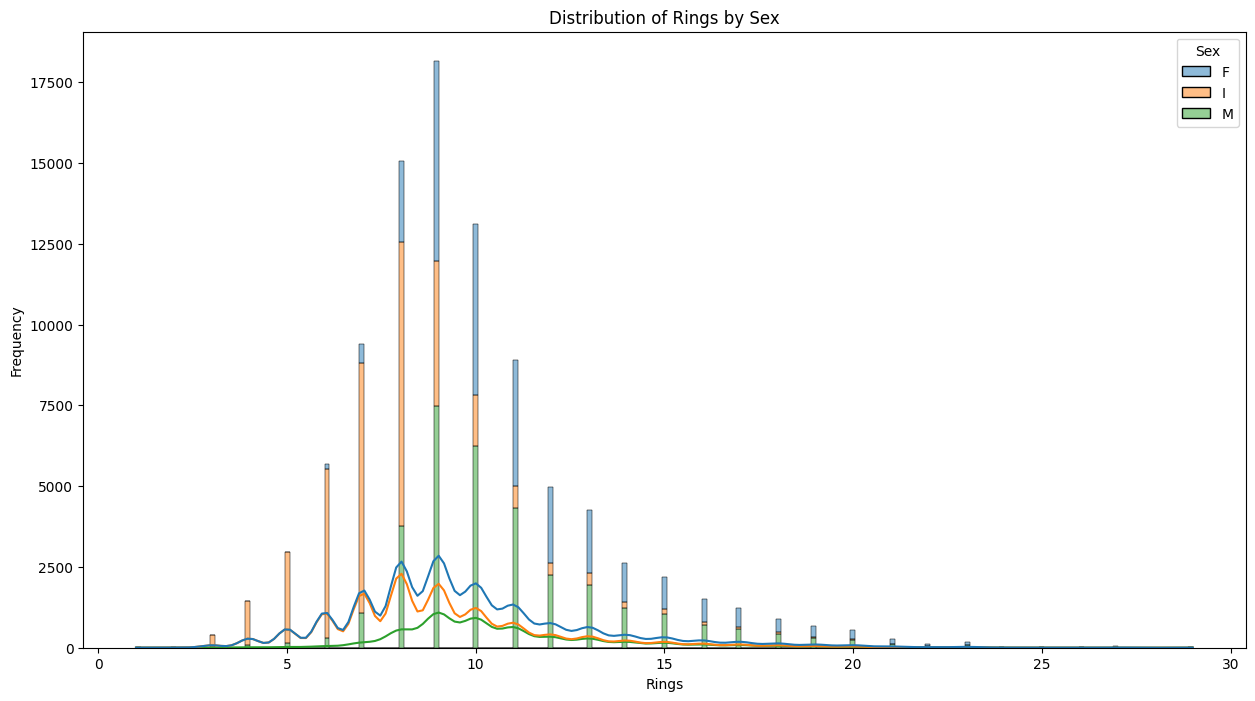

In [23]:

fig, axs = plt.subplots(figsize=(15, 8))
sns.histplot(x='Rings', data=train_sub, hue='Sex', kde=True, multiple='stack', ax=axs)
axs.set_title('Distribution of Rings by Sex')
axs.set_xlabel('Rings')
axs.set_ylabel('Frequency')

plt.show()

- 나이를 먹어도 유충인 개체들이 존재함

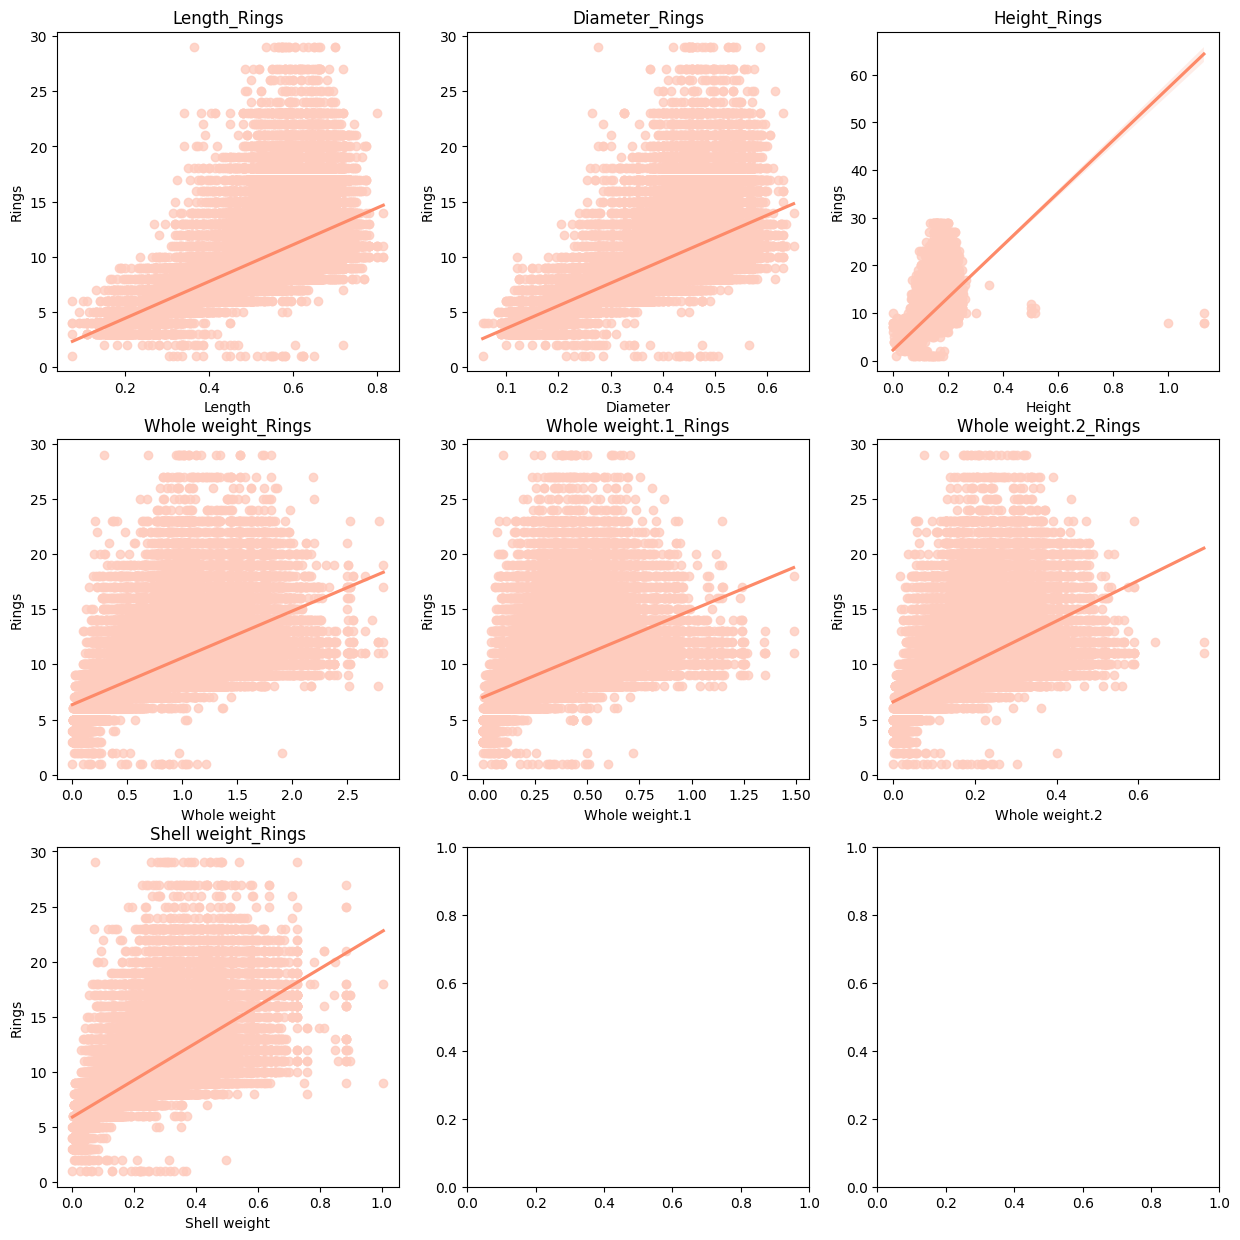

In [24]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
sns.regplot(x='Length',y='Rings',data=train_sub,ax=axs[0, 0], scatter_kws = {'color':'#FECCBE'}, line_kws = {'color':'#FD8A69'})
axs[0, 0].set_title('Length_Rings')
sns.regplot(x='Diameter',y='Rings',data=train_sub,ax=axs[0, 1],scatter_kws = {'color':'#FECCBE'}, line_kws = {'color':'#FD8A69'})
axs[0, 1].set_title('Diameter_Rings')
sns.regplot(x='Height',y='Rings',data=train_sub,ax=axs[0, 2],scatter_kws = {'color':'#FECCBE'}, line_kws = {'color':'#FD8A69'})
axs[0, 2].set_title('Height_Rings')
sns.regplot(x='Whole weight',y='Rings',data=train_sub,ax=axs[1, 0],scatter_kws = {'color':'#FECCBE'}, line_kws = {'color':'#FD8A69'})
axs[1, 0].set_title('Whole weight_Rings')
sns.regplot(x='Whole weight.1',y='Rings',data=train_sub,ax=axs[1, 1],scatter_kws = {'color':'#FECCBE'}, line_kws = {'color':'#FD8A69'})
axs[1, 1].set_title('Whole weight.1_Rings')
sns.regplot(x='Whole weight.2',y='Rings',data=train_sub,ax=axs[1, 2],scatter_kws = {'color':'#FECCBE'}, line_kws = {'color':'#FD8A69'})
axs[1, 2].set_title('Whole weight.2_Rings')
sns.regplot(x='Shell weight',y='Rings',data=train_sub,ax=axs[2, 0],scatter_kws = {'color':'#FECCBE'}, line_kws = {'color':'#FD8A69'})
axs[2, 0].set_title('Shell weight_Rings')

plt.show()

### height 재확인

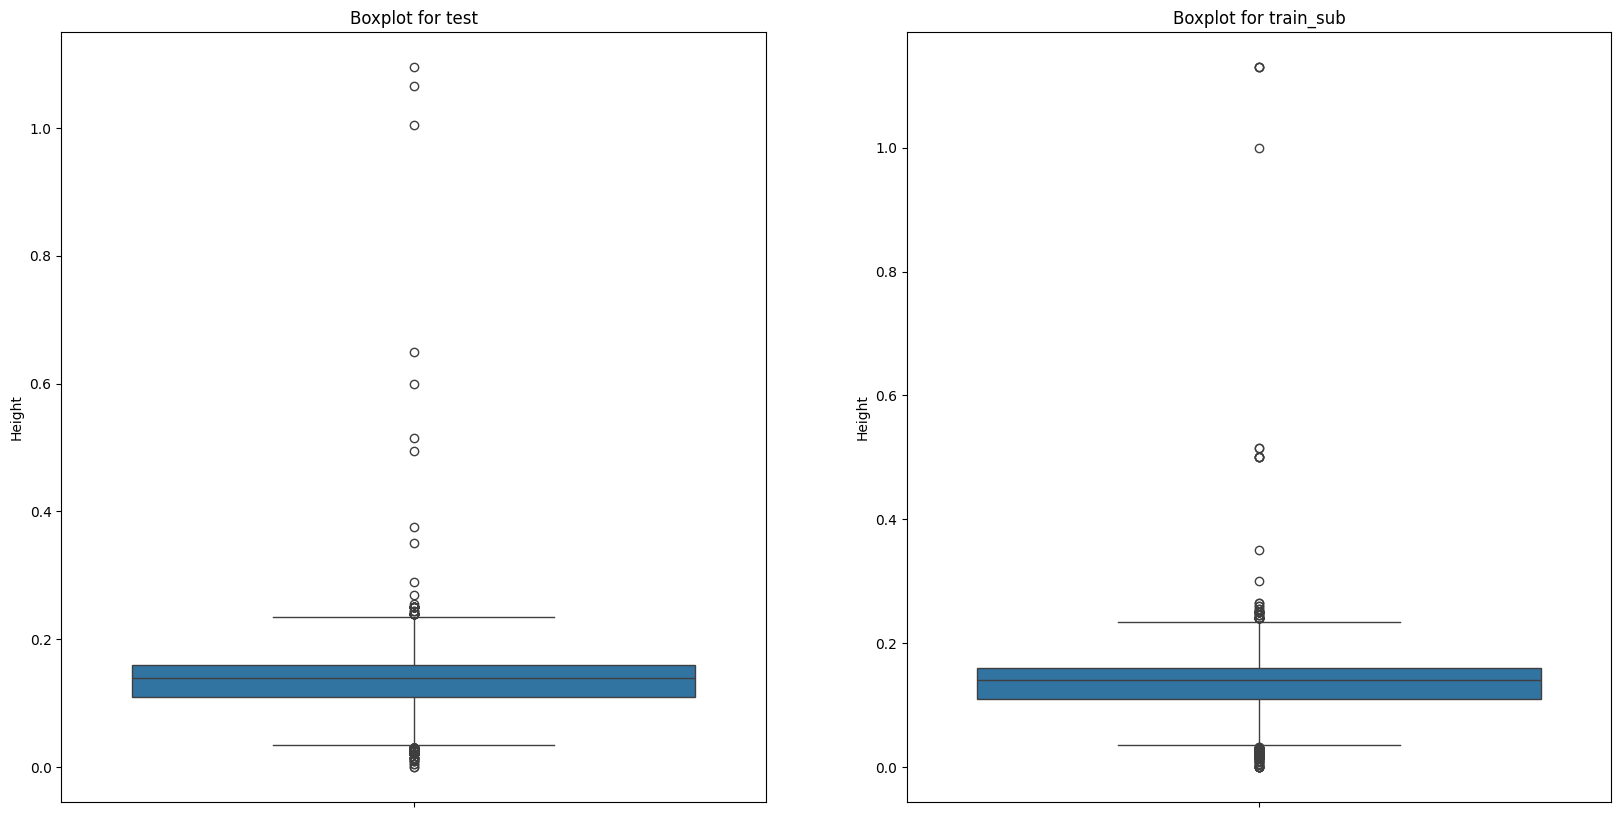

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot the boxplot for df2
sns.boxplot(data=test_drop_id['Height'], ax=axs[0])
axs[0].set_title('Boxplot for test')

# Plot the boxplot for df2_train
sns.boxplot(data=train_sub['Height'], ax=axs[1])
axs[1].set_title('Boxplot for train_sub')

plt.show()

# train과 test 의 height 비교
#  이상치가 아니라고 판단하고 진행

## 생성변수 추가

In [26]:
train_sub['d_l']=train_sub['Diameter']/train_sub['Length']
train_sub['h_l']=train_sub['Height']/train_sub['Length']
train_sub['sw_ww']=train_sub['Shell weight']/train_sub['Whole weight']
train_sub['mw']=(train_sub['Whole weight']+train_sub['Whole weight.1']+train_sub['Whole weight.2'])/3
display(train_sub.head()), display(train_sub.info())

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   F   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   F   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   I   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   M   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   I   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings       d_l       h_l     sw_ww        mw  
0        0.2400     11  0.781818  0.272727  0.311082  0.415500  
1        0.3200     11  0.777778  0.230159  0.283186  0.621500  
2        0.0050      6  0.687500  0.156250  0.238095  0.009833  
3        0.2500     10  0.798319  0.252101  0.273373  0.498500  
4        0.1975      9  0.765766  0.234234  0.252558  0.437167

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
 9   d_l             94792 non-null  float64
 10  h_l             94792 non-null  float64
 11  sw_ww           94792 non-null  float64
 12  mw              94792 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 10.1+ MB


None

(None, None)

In [27]:
test_drop_id['d_l']=test_drop_id['Diameter']/test_drop_id['Length']
test_drop_id['h_l']=test_drop_id['Height']/test_drop_id['Length']
test_drop_id['sw_ww']=test_drop_id['Shell weight']/test_drop_id['Whole weight']
test_drop_id['mw']=(test_drop_id['Whole weight']+test_drop_id['Whole weight.1']+test_drop_id['Whole weight.2'])/3
display(test_drop_id.head()),display(test_drop_id.info())

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   M   0.645     0.475   0.155        1.2380          0.6185          0.3125   
1   M   0.580     0.460   0.160        0.9830          0.4785          0.2195   
2   M   0.560     0.420   0.140        0.8395          0.3525          0.1845   
3   M   0.570     0.490   0.145        0.8740          0.3525          0.1865   
4   I   0.415     0.325   0.110        0.3580          0.1575          0.0670   

   Shell weight       d_l       h_l     sw_ww        mw  
0        0.3005  0.736434  0.240310  0.242730  0.723000  
1        0.2750  0.793103  0.275862  0.279756  0.560333  
2        0.2405  0.750000  0.250000  0.286480  0.458833  
3        0.2350  0.859649  0.254386  0.268879  0.471000  
4        0.1050  0.783133  0.265060  0.293296  0.194167

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
 8   d_l             60411 non-null  float64
 9   h_l             60411 non-null  float64
 10  sw_ww           60411 non-null  float64
 11  mw              60411 non-null  float64
dtypes: float64(11), object(1)
memory usage: 5.5+ MB


None

(None, None)

## 성별 인코딩

In [28]:
binary_sex = pd.get_dummies(train_sub['Sex'])
train_sub_dum = pd.concat([train_sub,binary_sex], axis=1)
train_sub_dum.head(1)

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   F    0.55      0.43    0.15        0.7715          0.3285          0.1465   

   Shell weight  Rings       d_l       h_l     sw_ww      mw     F      I  \
0          0.24     11  0.781818  0.272727  0.311082  0.4155  True  False   

       M  
0  False

In [29]:
train_sub_dum['F'] = train_sub_dum['F'].astype(int)
train_sub_dum['I'] = train_sub_dum['I'].astype(int)
train_sub_dum['M'] = train_sub_dum['M'].astype(int)
train_sub_dum = train_sub_dum.drop('Sex', axis=1)
train_sub_dum.head(1) # train 데이터 완료

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0    0.55      0.43    0.15        0.7715          0.3285          0.1465   

   Shell weight  Rings       d_l       h_l     sw_ww      mw  F  I  M  
0          0.24     11  0.781818  0.272727  0.311082  0.4155  1  0  0

In [30]:
test_drop_id.head()

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   M   0.645     0.475   0.155        1.2380          0.6185          0.3125   
1   M   0.580     0.460   0.160        0.9830          0.4785          0.2195   
2   M   0.560     0.420   0.140        0.8395          0.3525          0.1845   
3   M   0.570     0.490   0.145        0.8740          0.3525          0.1865   
4   I   0.415     0.325   0.110        0.3580          0.1575          0.0670   

   Shell weight       d_l       h_l     sw_ww        mw  
0        0.3005  0.736434  0.240310  0.242730  0.723000  
1        0.2750  0.793103  0.275862  0.279756  0.560333  
2        0.2405  0.750000  0.250000  0.286480  0.458833  
3        0.2350  0.859649  0.254386  0.268879  0.471000  
4        0.1050  0.783133  0.265060  0.293296  0.194167

In [31]:
binary_sex = pd.get_dummies(test_drop_id['Sex'])
test_drop_id = pd.concat([test_drop_id,binary_sex], axis=1)
test_drop_id.head(1)

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   M   0.645     0.475   0.155         1.238          0.6185          0.3125   

   Shell weight       d_l      h_l    sw_ww     mw      F      I     M  
0        0.3005  0.736434  0.24031  0.24273  0.723  False  False  True

In [32]:
test_drop_id['F'] = test_drop_id['F'].astype(int)
test_drop_id['I'] = test_drop_id['I'].astype(int)
test_drop_id['M'] = test_drop_id['M'].astype(int)
test_drop_id.head(1)

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   M   0.645     0.475   0.155         1.238          0.6185          0.3125   

   Shell weight       d_l      h_l    sw_ww     mw  F  I  M  
0        0.3005  0.736434  0.24031  0.24273  0.723  0  0  1

In [33]:
test_drop_id.head(1)

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   M   0.645     0.475   0.155         1.238          0.6185          0.3125   

   Shell weight       d_l      h_l    sw_ww     mw  F  I  M  
0        0.3005  0.736434  0.24031  0.24273  0.723  0  0  1

In [34]:
train_sub_dum.head(1)

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0    0.55      0.43    0.15        0.7715          0.3285          0.1465   

   Shell weight  Rings       d_l       h_l     sw_ww      mw  F  I  M  
0          0.24     11  0.781818  0.272727  0.311082  0.4155  1  0  0

# 결과 출력

In [35]:
# 최종 작업 df 빼두기
train_sub_dum.to_csv('train_abalon.csv',index=False)

In [36]:
test_drop_id.to_csv('test_abalon.csv',index=False)

In [37]:
train_sub_dum.shape,test_drop_id.shape

((94792, 15), (60411, 15))

- 'train_abalon.csv'과 'test_abalon.csv' 저장
    - 차후 노트 2, 3 번에 데이터 로드하여 사용